In [17]:
#Task 2:- Movie Prediction

In [151]:
#Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [152]:
#Reading the dataset
df=pd.read_csv("IMDb Movies India.csv", encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [153]:
#Getting the shape of the dataset
df.shape

(15509, 10)

In [154]:
#Getting more info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [155]:
#Getting info about the new dataset
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [156]:
#Filtering and Preprocessing the dataset
features = df.columns
print(features)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [157]:
#Checking the null values
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [158]:
#Retrieving Unique genres
df["Genre"].unique()

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', nan, 'Comedy, Drama, Fantasy',
       'Comedy, Drama, Family', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Biography', 'Comedy, Horror', 'Action',
       'Drama, Horror, Mystery', 'Comedy', 'Action, Thriller',
       'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Dr

In [159]:
#Getting rating distribution
df["Rating"].value_counts()

Rating
6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 84, dtype: int64

In [160]:
#Deleting the duplicate values
df.drop_duplicates(inplace = True)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
#Modifying the dataset by taking required features
attributes = ["Name","Year","Duration","Votes","Rating"]
df.drop_duplicates(subset = attributes, inplace = True)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
#Checking the missing values
df.isna().sum()

Name           0
Year         527
Duration    8257
Genre       1874
Rating      7576
Votes       7575
Director     523
Actor 1     1612
Actor 2     2377
Actor 3     3135
dtype: int64

In [163]:
#Dropping the missing values
df.dropna(inplace = True)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [164]:
movie_name = df[["Name","Rating"]]
movie_name.head()

,Name,Rating
1,#Gadhvi (He thought he was Gandhi),7.0
3,#Yaaram,4.4
5,...Aur Pyaar Ho Gaya,4.7
6,...Yahaan,7.4
8,?: A Question Mark,5.6


<function matplotlib.pyplot.show(close=None, block=None)>

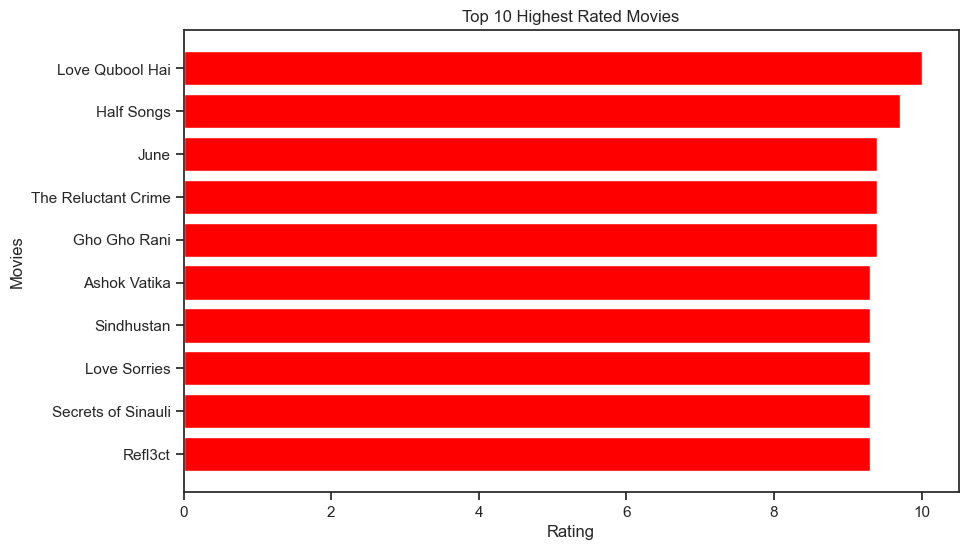

In [165]:
#Plotting the top 10 highest rated movies
top_movies = df.sort_values(by = "Rating", ascending = False).head(10)
plt.figure(figsize = (10,6))
plt.barh(top_movies["Name"],top_movies["Rating"], color = "Red")
plt.xlabel("Rating")
plt.ylabel("Movies")
plt.title("Top 10 Highest Rated Movies")
plt.gca().invert_yaxis()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

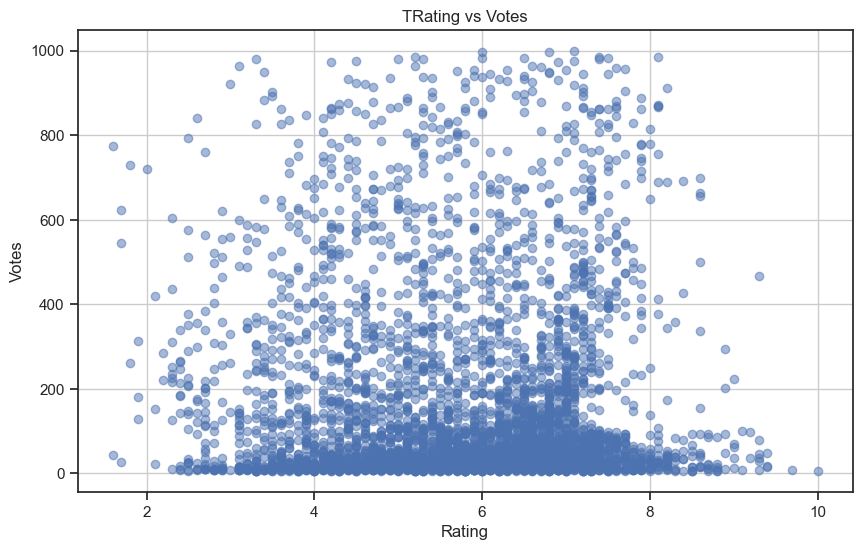

In [166]:
#Plotting Scatter plot of Rating vs Votes
df["Votes"] = pd.to_numeric(df["Votes"],errors = 'coerce')
plt.figure(figsize = (10,6))
plt.scatter(df["Rating"],df["Votes"], alpha = 0.5, color = "b")
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.title("TRating vs Votes")
plt.grid(True)
plt.show

C:\Users\aksha\AppData\Local\Temp\ipykernel_10052\926853229.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Number of Movies", y = "Actors", data = actor_count.head(10), palette = "rainbow")


<function matplotlib.pyplot.show(close=None, block=None)>

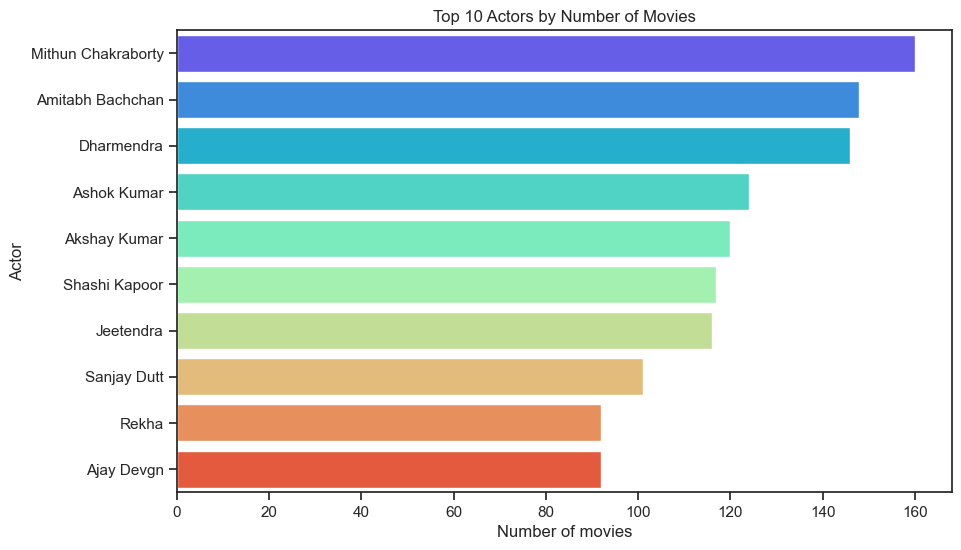

In [167]:
#Plotting the top 10 actors by number of movies
actors = pd.concat([df["Actor 1"], df["Actor 2"], df["Actor 3"]])
actor_count = actors.value_counts().reset_index()
actor_count.columns = ["Actors","Number of Movies"]
plt.figure(figsize = (10,6))
sns.barplot(x = "Number of Movies", y = "Actors", data = actor_count.head(10), palette = "rainbow")
plt.xlabel("Number of movies")
plt.ylabel("Actor")
plt.title("Top 10 Actors by Number of Movies")
plt.show

C:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


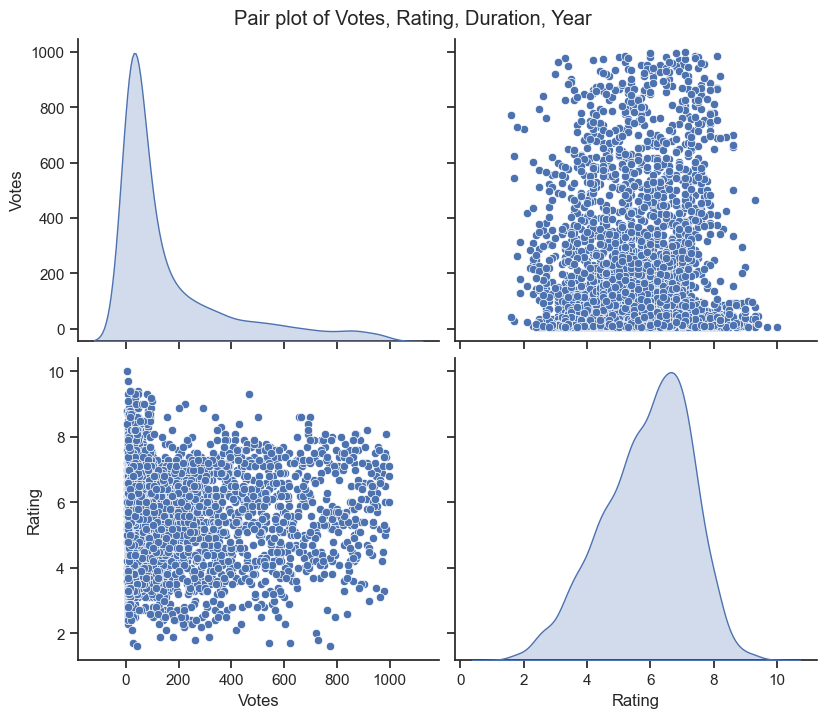

In [168]:
#Plotting pair plot of Votes, Rating, Duration, Year
columns = ["Votes","Rating","Duration","Year"]
sns.set(style = "ticks")
sns.pairplot(df[columns], diag_kind = "kde", markers = "o", palette = "viridis", height = 3.5, aspect = 1.2)
plt.suptitle("Pair plot of Votes, Rating, Duration, Year", y = 1.02)
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\aksha\AppData\Local\Temp\ipykernel_10052\2939565712.py:4: SyntaxWarning: invalid escape sequence '\d'
  df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)
C:\Users\aksha\AppData\Local\Temp\ipykernel_10052\2939565712.py:5: SyntaxWarning: invalid escape sequence '\d'
  df['Year'] = df['Year'].str.extract('(\d+)').astype(float)


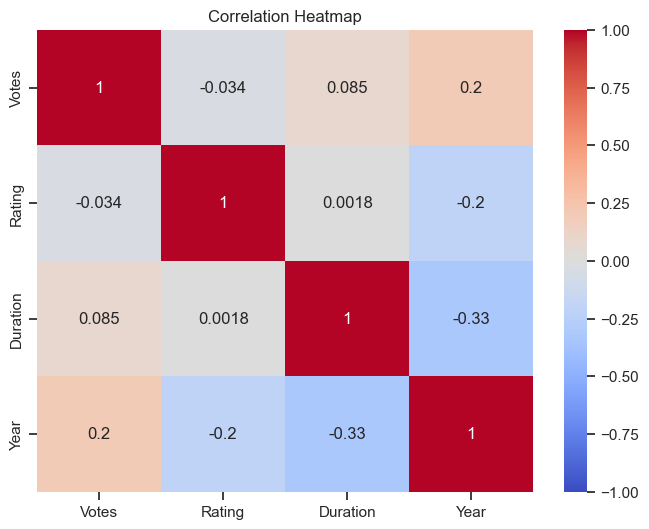

In [169]:
#Plotting a correalation heatmap
df['Duration'] = df['Duration'].astype(str)
df['Year'] = df['Year'].astype(str)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)
num_columns = ["Votes","Rating","Duration","Year"]
correlation_matrix = df[num_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", vmin = -1, vmax = 1)
plt.title("Correlation Heatmap")
plt.show()

In [170]:
#Sorting dataset and adding Vote Count Percentile
sorted_df = df.sort_values(by ="Votes", ascending = False)
sorted_df["Vote Count Percentile"] = sorted_df["Votes"].rank(pct = True) *100
sorted_df.reset_index(drop = True, inplace = True)
sorted_df[["Name","Votes","Vote Count Percentile"]]

,Name,Votes,Vote Count Percentile
0,Satyam Shivam Sundaram: Love Sublime,999.0,100.000000
1,Hera Pheri,998.0,99.976695
2,Kurukshetra,996.0,99.953391
3,Dishkiyaoon,986.0,99.930086
4,Kadvi Hawa,985.0,99.895129
...,...,...,...
5654,Ziddi,NaN,NaN
5655,Zila Ghaziabad,NaN,NaN
5656,Zinda,NaN,NaN
5657,Zindagi Na Milegi Dobara,NaN,NaN


In [171]:
#Dropping null values of Votes
df = df.dropna(subset = ["Votes"])
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014.0,116.0,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [172]:
#Model Training
X = df[["Year","Duration","Votes"]]
Y = df["Rating"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.8, random_state = 42)

model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [173]:
#Model Prediction
pred = model.predict(X_test)
pred

array([5.0998457 , 6.00861659, 5.18794918, 5.74940664, 5.71442099,
       5.97645754, 6.88497409, 5.75438758, 5.57777299, 5.77859398,
       5.24477629, 5.27844697, 5.28252324, 5.64054852, 5.73972186,
       5.71017979, 6.09066129, 6.13354097, 5.73148529, 5.67196309,
       5.24854802, 5.64988276, 5.69101539, 6.14514754, 5.66171616,
       6.21685997, 4.94180302, 5.41811346, 5.98946806, 5.81835853,
       5.28312931, 5.99383208, 5.82005384, 5.12070214, 6.43692494,
       5.46333935, 5.50856601, 5.97307645, 5.23704323, 5.52173673,
       5.87361788, 6.02513421, 5.6437318 , 5.47751041, 6.10920361,
       5.40170925, 5.67431006, 5.51956506, 6.40606463, 5.43852883,
       5.62399769, 5.88587153, 5.96203333, 6.28337786, 5.83206215,
       6.16261698, 5.6215029 , 5.28224524, 5.68702142, 5.61196286,
       6.2713573 , 5.77173942, 5.24603513, 5.3750818 , 5.99516271,
       5.27295528, 5.60303682, 5.74416336, 5.53909198, 5.53806324,
       6.20156033, 5.70432375, 5.70588714, 5.3100017 , 5.98571

In [174]:
print(Y_test)

12783    6.8
5546     6.7
13910    6.0
14372    6.9
13449    5.6
        ... 
6086     5.8
2644     4.5
7229     4.1
12285    6.6
6028     5.7
Name: Rating, Length: 859, dtype: float64


In [175]:
#Checking the error in model
mae = mean_absolute_error(Y_test,pred)
rmse = mean_squared_error(Y_test, pred, squared = False)
r2 = r2_score(Y_test,pred)
print(f"Mean Absolue Error : {mae}")
print(f"Root Mean Squared Error : {rmse}")
print(f"R- Squared (R2) Score : {r2}")

Mean Absolue Error : 1.0496859988223555
Root Mean Squared Error : 1.32649371819282
R- Squared (R2) Score : 0.11105814747628162


C:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
